# Part II - (Prosper Loans Explanatory Analysis)

## by (Modupeoluwa Adedeji)

## Investigation Overview

## Summary of findings
Most of the loans are intermediate term loans with a repayment period of 1 to 5 years while most people belong to the 3 years repayment period. These loans are mostly used for debt consolidation (amount received from the new loan is used to pay off other debts). From the analysis, most of the loans are given to employed persons with an income range of $25,000 and above. It is also observed that there is a steady increase in loan disbursements from 2010 till2014 this could be due to global finacial crisis during the period with 2013 being the year when most loans was taken.During exploration, I found that current and completed loans have lower rate than the past-due loans and chargedoff loans and the borrower's interest rate is negatively correlated with the amount of loan. I also found that borrowers with better ratings have access to larger loan amount

## Key Insights for Presentation
For the presentation, I focused on the relationship between the BorrowerAPR and the important features such as;

The relationship between LoanOriginalAmount, MonthlyLoanPayment and term

Distribution of loan original amount over the years and the income range

The relationship between BorrowerAPR, LoanOriginalAmount and income range

The relationship between BorrowerAPR, LoanOriginalAmount and loan term

## Dataset Overview
The proper loan dataset consist of 113,937 entries and 81 features . But for the sake of this analysis,i selected 15 variables which are;ListingKey,ListingCreationDate,LoanOriginalAmount,MonthlyLoanPayment,Term,LoanStatus,BorrowerAPR,CreditGrade,ProsperRating (Alpha),ListingCategory (numeric),BorrowerState,EmploymentStatus,DebtToIncomeRatio,IncomeRange and StatedMonthlyIncome.

After cleaning and wrangling of the data,i was left with 113066 rows and 15 columns including;LoanOriginalAmount ,BorrowerAPR ,EmploymentStatus among others which was used for the analysis. I also use a sample of 1000 size of the total dataset for the multivariate population for better visualization

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
Clean_loan_data = pd.read_csv("cleaned_prosper_data.csv")

In [3]:
# extracting a sample size of 1000 from the total population
np.random.seed(2020)
samples = np.random.choice(a = Clean_loan_data.shape[0],size = 1000, replace = False)
sample_data = Clean_loan_data.iloc[samples]

## What is the relationship between LoanOriginalAmount, MonthlyLoanPayment and term

There is positive relationship between LoanOriginalAmount and MonthlyLoanPayment i.e the higher the loan the higher the monthlyloanpayment,there is no 12 months loan term for large loanoriginal amount

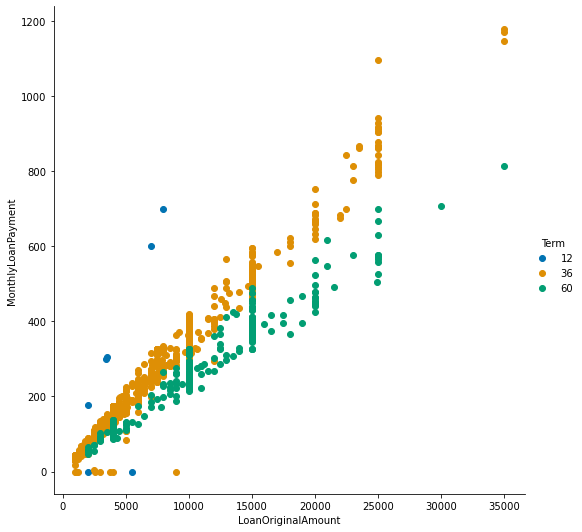

In [4]:
# relationship between LoanOriginalAmount, MonthlyLoanPayment and term
g = sns.FacetGrid(data = sample_data, hue = 'Term', size = 7.5, palette = 'colorblind')
g.map(plt.scatter, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend();

## What is the Distribution of loan original amount over the years and the income range

There seems to be increase in the amount of loan given from 2010 to 2014,and the predominant income range for the loan is from 50,000 and above

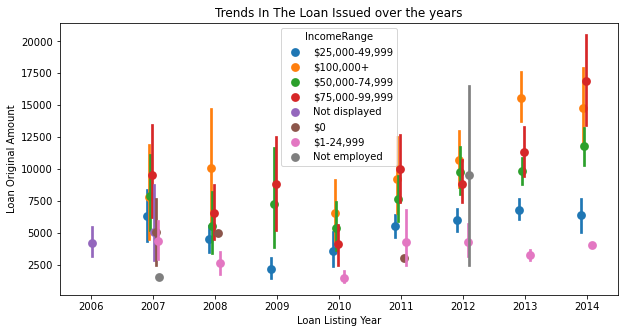

In [5]:
# plotting the yearly trend for each loan amount for each income range
plt.figure(figsize=[10,5])
sns.pointplot(data= sample_data, x='ListingYear', y='LoanOriginalAmount', linestyles='', hue='IncomeRange', dodge=True)
plt.xlabel('Loan Listing Year')
plt.ylabel('Loan Original Amount')
plt.title('Trends In The Loan Issued over the years');

## Define a function to plot a Scatterplot showing how the features relate with Loan Orginal Amount and BorrowerAPR

In [6]:
def plotfacetgrid(hue):
    g = sns.FacetGrid(data = sample_data, hue = hue, size = 8)
    #setting the variable and labelling  for the scatterplot
    g.map(plt.scatter,'BorrowerAPR', 'LoanOriginalAmount')
    g.set(yscale = 'log')
    plt.ylabel('LoanOriginalAmount (Log Transformed)',fontsize = 12)
    plt.xlabel('BorrowerAPR',weight = "bold", fontsize = 12)
    plt.legend(title= hue , loc = "center left", bbox_to_anchor = (1, 0.5))
    plt.title('BorrowerAPR and LoanOrginal Amount for '+hue, weight = "bold", fontsize = 14)
    plt.yticks([1e3,2e3,3e3,4e3,5e3,6e3,7e3,8e3,9e3,1e4,1.5e4,2e4,2.5e4,3e4,3.5e4,4e4], ['1k','2k','3k','4k','5k','6k','7k','8k','9k','10k','15k','20k','25k','3ok','35k','40k']);

## What is the relationship between BorrowerAPR, LoanOriginalAmount and income range

IncomeRange looks well distributed,High incomes earners can take higher amount of loan and the higher the loan the lower the APR

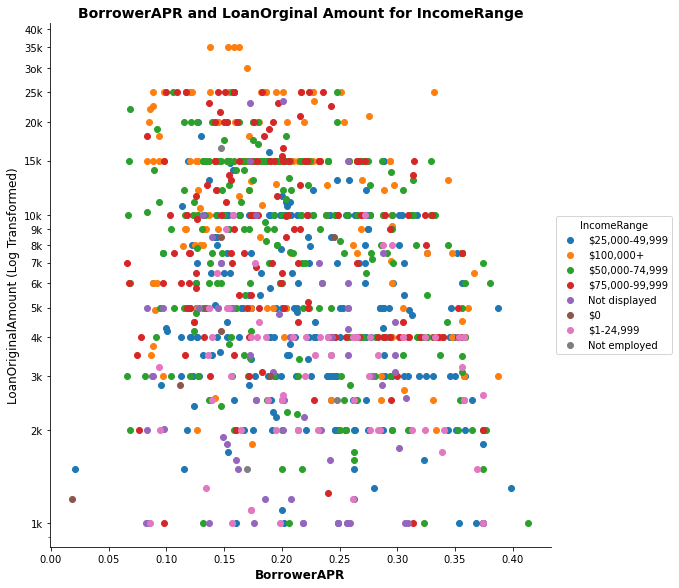

In [7]:
plotfacetgrid('IncomeRange')

## What is the relationship between BorrowerAPR, LoanOriginalAmount and loan term

it can be observed that longer loan term is provided for higher amount of loan



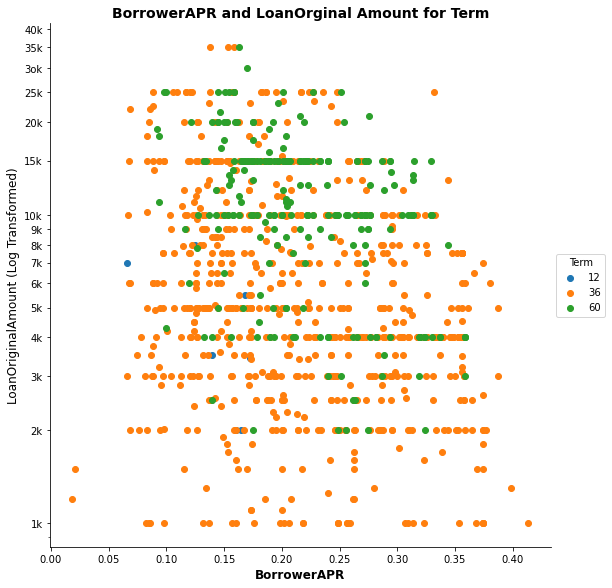

In [8]:
plotfacetgrid('Term')

In [ ]:
!jupyter nbconvert Prosperloan_Explanatory_analysis_slides.ipynb --to slides --post serve --no-input --no-prompt